In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys

df=pd.read_csv("HR-Employee-Attrition.csv")
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

## Dropping meaningless columns:
1. EmployeeCount
2. Over18
3. StandardHours

In [2]:
d_cols = ['EmployeeCount', 'Over18', 'StandardHours']
for column in df:
    if column in d_cols:
        df.drop(column, inplace=True, axis=1)
df.head(5)
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

## Converting to suitable data types:
a) Strings/Numeric to Boolean values  
b) Encoding ordinal data
c) Converting from default type object to string

In [3]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance              int64
YearsAtCompany      

In [31]:
#Categorising the data
con_df = df[["Age", "DistanceFromHome","HourlyRate", "MonthlyIncome", "MonthlyRate", "NumCompaniesWorked", "PercentSalaryHike", "TotalWorkingYears","TrainingTimesLastYear","WorkLifeBalance","YearsAtCompany","YearsInCurrentRole","YearsSinceLastPromotion","YearsWithCurrManager"]]
bin_df = df[["Attrition", "Gender", "OverTime"]]
ord_df = df[["BusinessTravel", "Education", "EnvironmentSatisfaction", "JobInvolvement", "JobLevel", "JobSatisfaction", "PerformanceRating", "RelationshipSatisfaction", "StockOptionLevel", "WorkLifeBalance"]]

In [4]:
bool_atr = ['OverTime', 'Attrition', 'Gender']

scale_mapper1 = {"No":0, "Yes":1}
df["OverTime"] = df["OverTime"].replace(scale_mapper1)
df["Attrition"] = df["Attrition"].replace(scale_mapper1)

scale_mapper2 = {"Female":0, "Male":1}
df["Gender"] = df["Gender"].replace(scale_mapper2)

# Cannot construct histograms with boolean values

# for i in bool_atr:
#     df[i] = df[i].astype('bool')
    
#df["OverTime"]

In [5]:
scale_mapper3 = {"Non-Travel":0, "Travel_Rarely":1, "Travel_Frequently":2}
df["BusinessTravel"] = df["BusinessTravel"].replace(scale_mapper3)
df.head(5)

Age  Attrition  BusinessTravel  DailyRate              Department  \
0   41          1               1       1102                   Sales   
1   49          0               2        279  Research & Development   
2   37          1               1       1373  Research & Development   
3   33          0               2       1392  Research & Development   
4   27          0               1        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeNumber  \
0                 1          2  Life Sciences               1   
1                 8          1  Life Sciences               2   
2                 2          2          Other               4   
3                 3          4  Life Sciences               5   
4                 2          1        Medical               7   

   EnvironmentSatisfaction  ...  PerformanceRating  RelationshipSatisfaction  \
0                        2  ...                  3                         1   
1                        3  ...                  4                         4   
2                        4  ...                  3                         2   
3                        4  ...                  3                         3   
4                        1  ...                  3                         4   

   StockOptionLevel  TotalWorkingYears TrainingTimesLastYear  WorkLifeBalance  \
0                 0                  8                     0                1   
1                 1                 10                     3                3   
2                 0                  7                     3                3   
3                 0                  8                     3                3   
4                 1                  6                     3                3   

  YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
0              6                   4                        0   
1             10                   7                        1   
2              0                   0                        0   
3              8                   7                        3   
4              2                   2                        2   

   YearsWithCurrManager  
0                     5  
1                     7  
2                     0  
3                     0  
4                     2  

[5 rows x 32 columns]

In [6]:
#Not working for some reason

new=[]
for column in df:
    if df.dtypes[column]=="object":
        new.append(column)
new

# for column in df:
#     if column in new:
#         df[column] = df[column].astype('|S')

#df["Department"] = df["Department"].astype('str')
#df.dtypes

['Department', 'EducationField', 'JobRole', 'MaritalStatus']

## Rearranging columns:
- EmployeeNumber (primary key)
- Attrition (target value)

In [7]:
df = df[["EmployeeNumber", "Age", "Gender","Department", "JobRole", "JobLevel","JobSatisfaction", "JobInvolvement", "PerformanceRating", "OverTime", 'EnvironmentSatisfaction', "EducationField", "Education", "BusinessTravel", "WorkLifeBalance","MaritalStatus", "RelationshipSatisfaction", "DistanceFromHome", "StockOptionLevel", "NumCompaniesWorked", "TotalWorkingYears","TrainingTimesLastYear","YearsAtCompany","YearsInCurrentRole","YearsSinceLastPromotion","YearsWithCurrManager","DailyRate","HourlyRate", "MonthlyIncome","MonthlyRate","PercentSalaryHike","Attrition"]]

### Other information:

In [8]:
df.shape

(1470, 32)

In [9]:
# No. of unique values in each attribute
df.nunique()

EmployeeNumber              1470
Age                           43
Gender                         2
Department                     3
JobRole                        9
JobLevel                       5
JobSatisfaction                4
JobInvolvement                 4
PerformanceRating              2
OverTime                       2
EnvironmentSatisfaction        4
EducationField                 6
Education                      5
BusinessTravel                 3
WorkLifeBalance                4
MaritalStatus                  3
RelationshipSatisfaction       4
DistanceFromHome              29
StockOptionLevel               4
NumCompaniesWorked            10
TotalWorkingYears             40
TrainingTimesLastYear          7
YearsAtCompany                37
YearsInCurrentRole            19
YearsSinceLastPromotion       16
YearsWithCurrManager          18
DailyRate                    886
HourlyRate                    71
MonthlyIncome               1349
MonthlyRate                 1427
PercentSal

In [65]:
#Check for duplicate rows
duplicate = df[df.duplicated()]
duplicate

Empty DataFrame
Columns: [EmployeeNumber, Age, Gender, Department, JobRole, JobLevel, JobSatisfaction, JobInvolvement, PerformanceRating, OverTime, EnvironmentSatisfaction, EducationField, Education, BusinessTravel, WorkLifeBalance, MaritalStatus, RelationshipSatisfaction, DistanceFromHome, StockOptionLevel, NumCompaniesWorked, TotalWorkingYears, TrainingTimesLastYear, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager, DailyRate, HourlyRate, MonthlyIncome, MonthlyRate, PercentSalaryHike, Attrition]
Index: []

[0 rows x 32 columns]

# Univariate Analysis

1. Histogram
2. Box Plot - Outliers
3. Count plot

## Histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002B87B2DFAC0>,
      dtype=object)

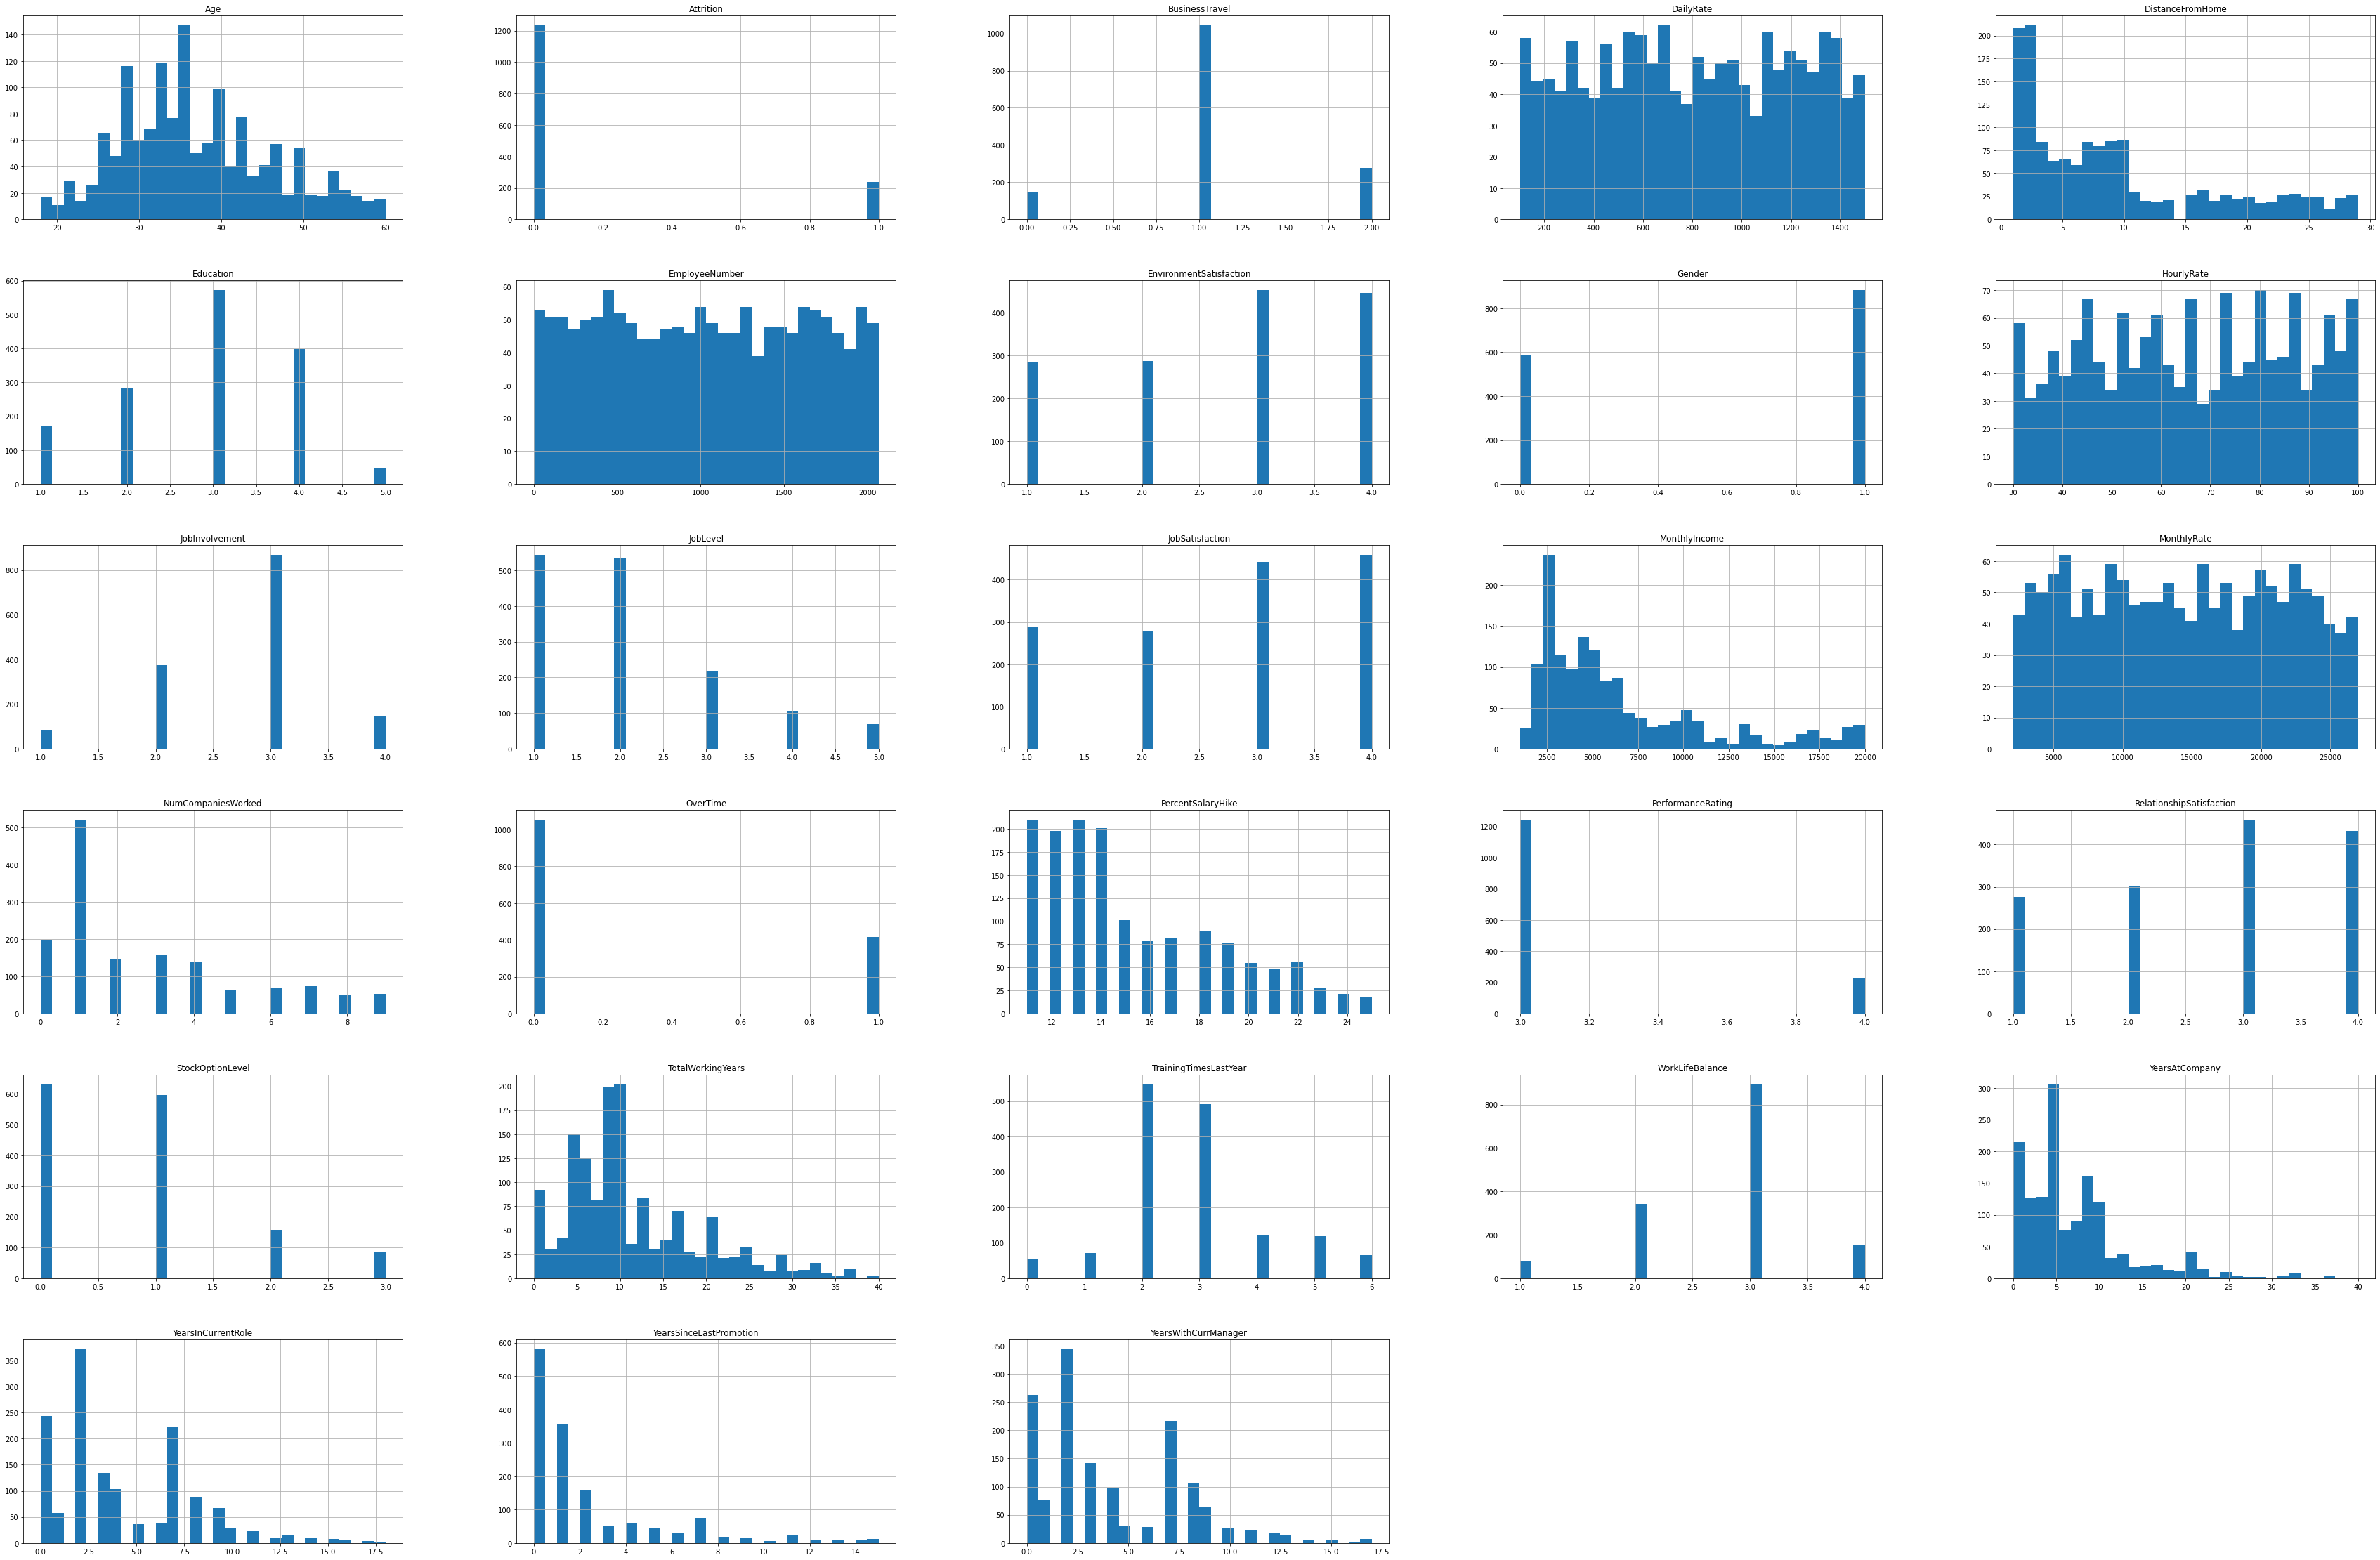

In [102]:

df.hist(bins=30, figsize=(60, 40))

## Outliers 
### Using Box Plot

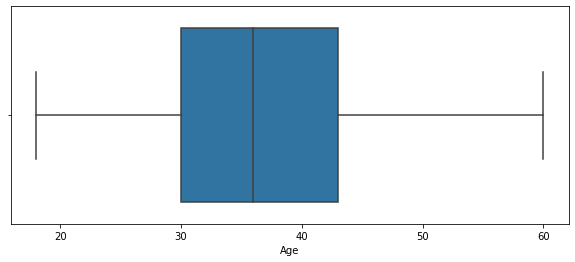

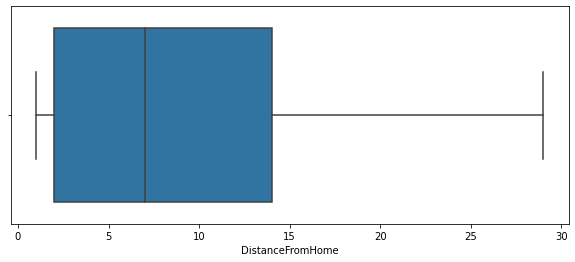

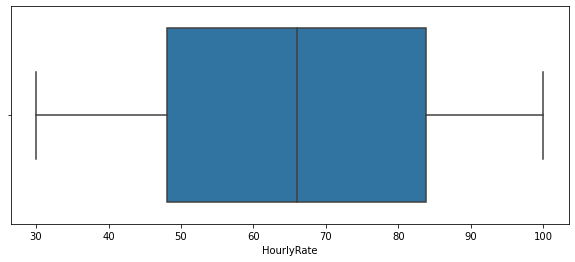

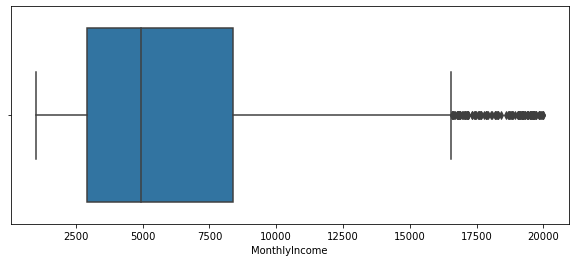

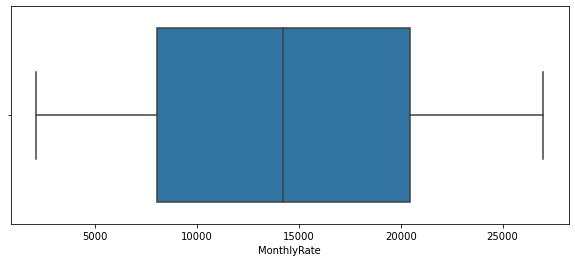

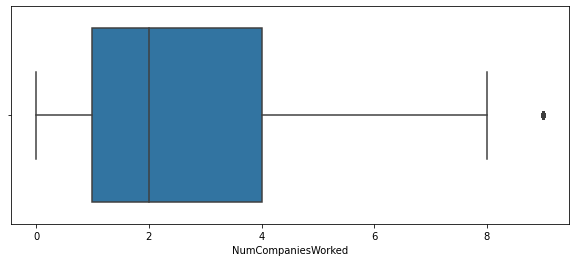

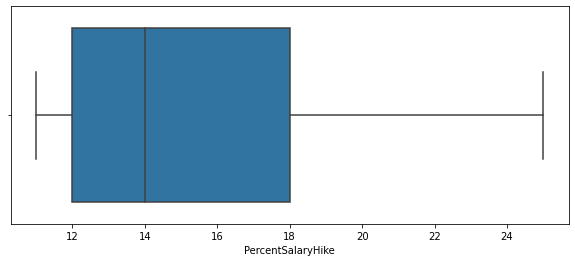

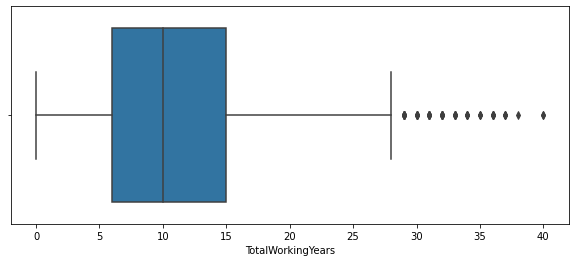

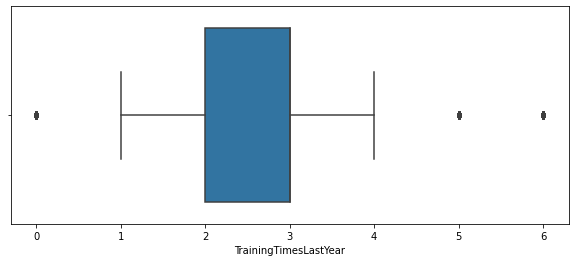

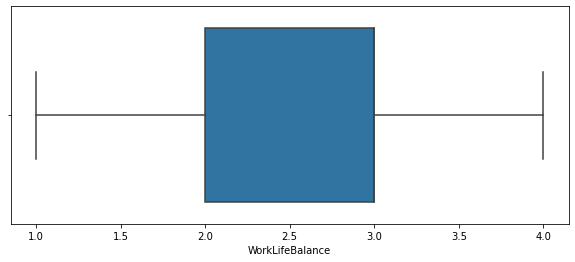

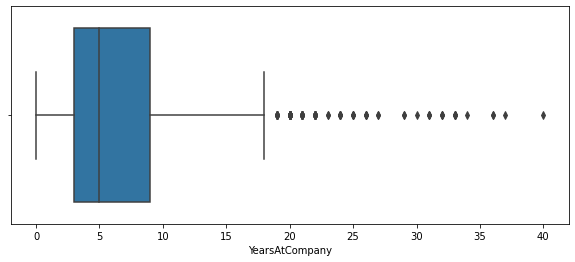

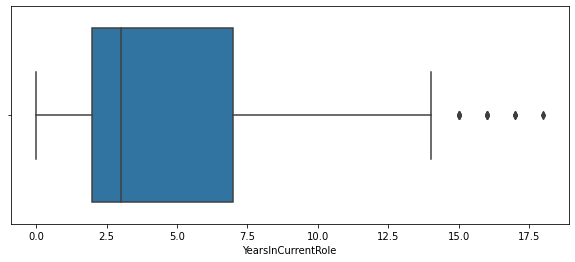

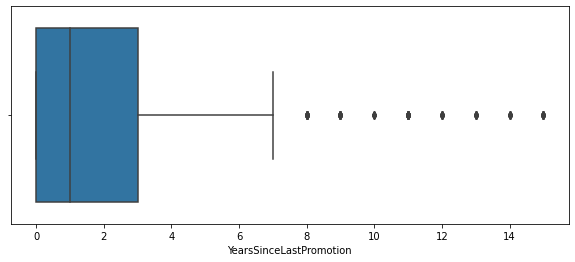

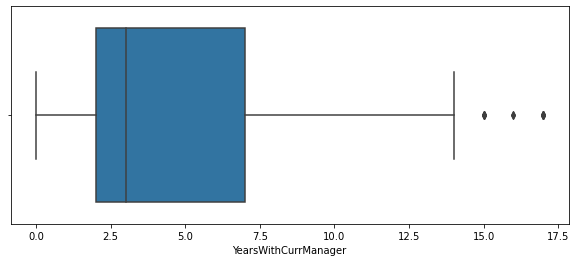

In [15]:
for column in con_df:
    plt.figure(figsize=(10,4))
    sns.boxplot(df[column])
    plt.show()
  

Outlier detected in 'TrainingTimesLastYear'

In [16]:
col = df['TrainingTimesLastYear']
print("Range of data:", col.max()-col.min())
q1 = col.quantile(0.25)
q3 = col.quantile(0.75)

iqr = q3 - q1

lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr)
count=0
for val in col:
    if (val < lower_bound) or (val > upper_bound):
        count+=1
        #print(val)
print("No. of outliers",count)


# Analyse if outlier have any dependency on attrition

Range of data: 6
No. of outliers 238


## Count plot - frequency of binary and ordinal data

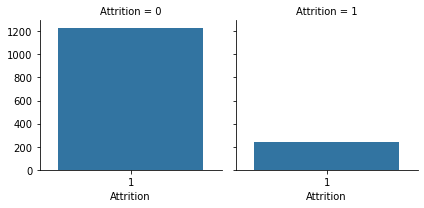

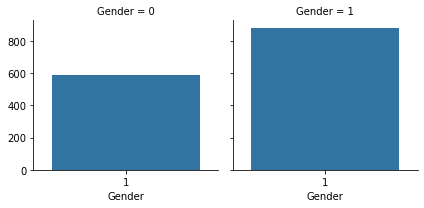

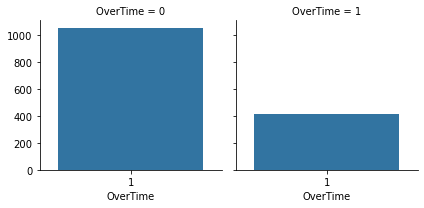

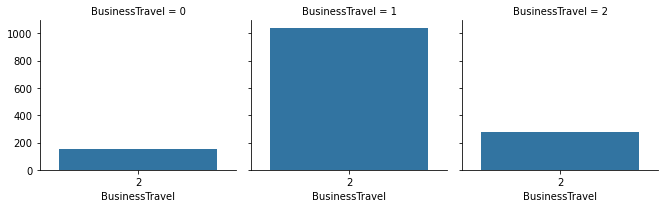

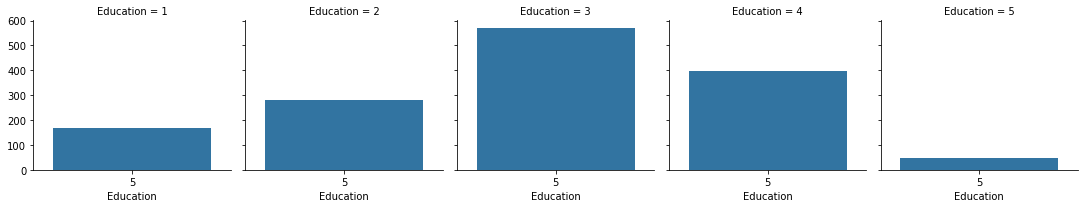

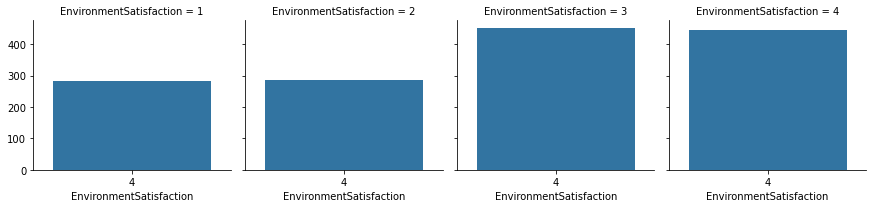

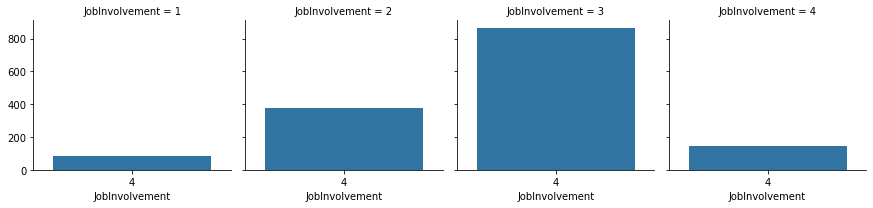

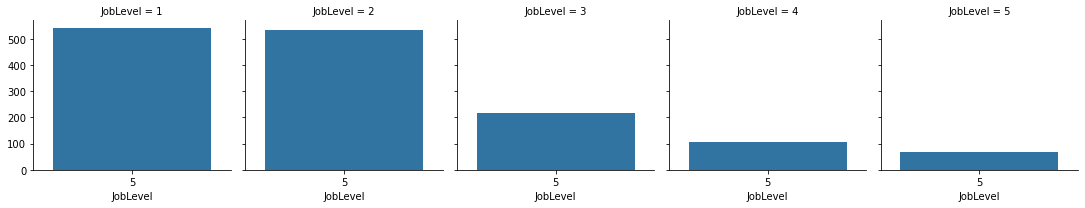

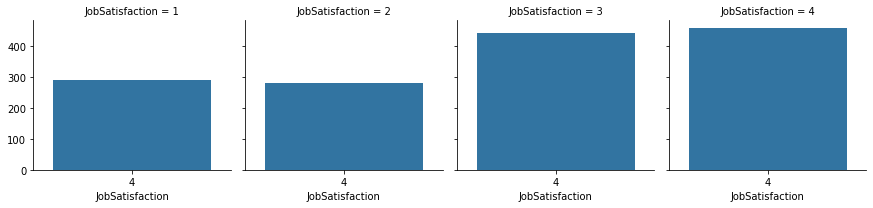

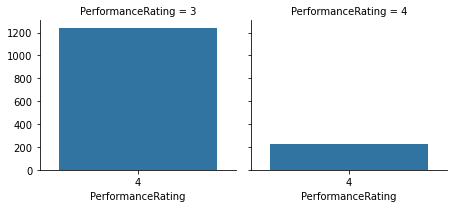

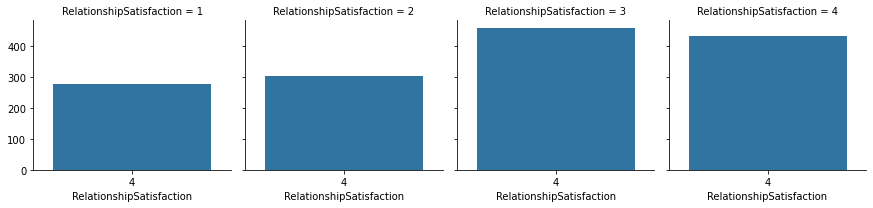

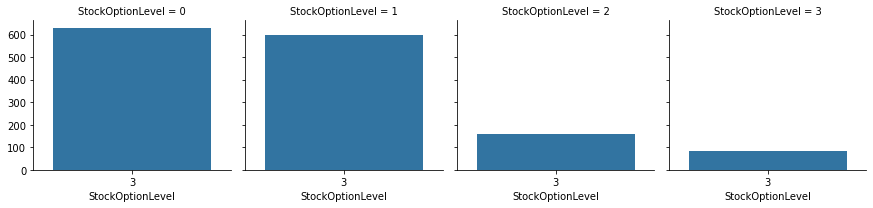

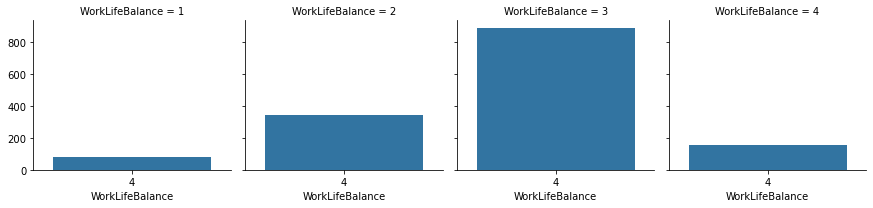

In [99]:
for column in bin_df:
    g = sns.FacetGrid(data=df, col=column, col_wrap=2)
    g.map(sns.countplot, column)

for column in ord_df:
    g = sns.FacetGrid(data=df, col=column, col_wrap=8)
    g.map(sns.countplot, column)

# Bivariate Analysis

##  Correlation and Heatmap

### Pair-plot - scatterplots

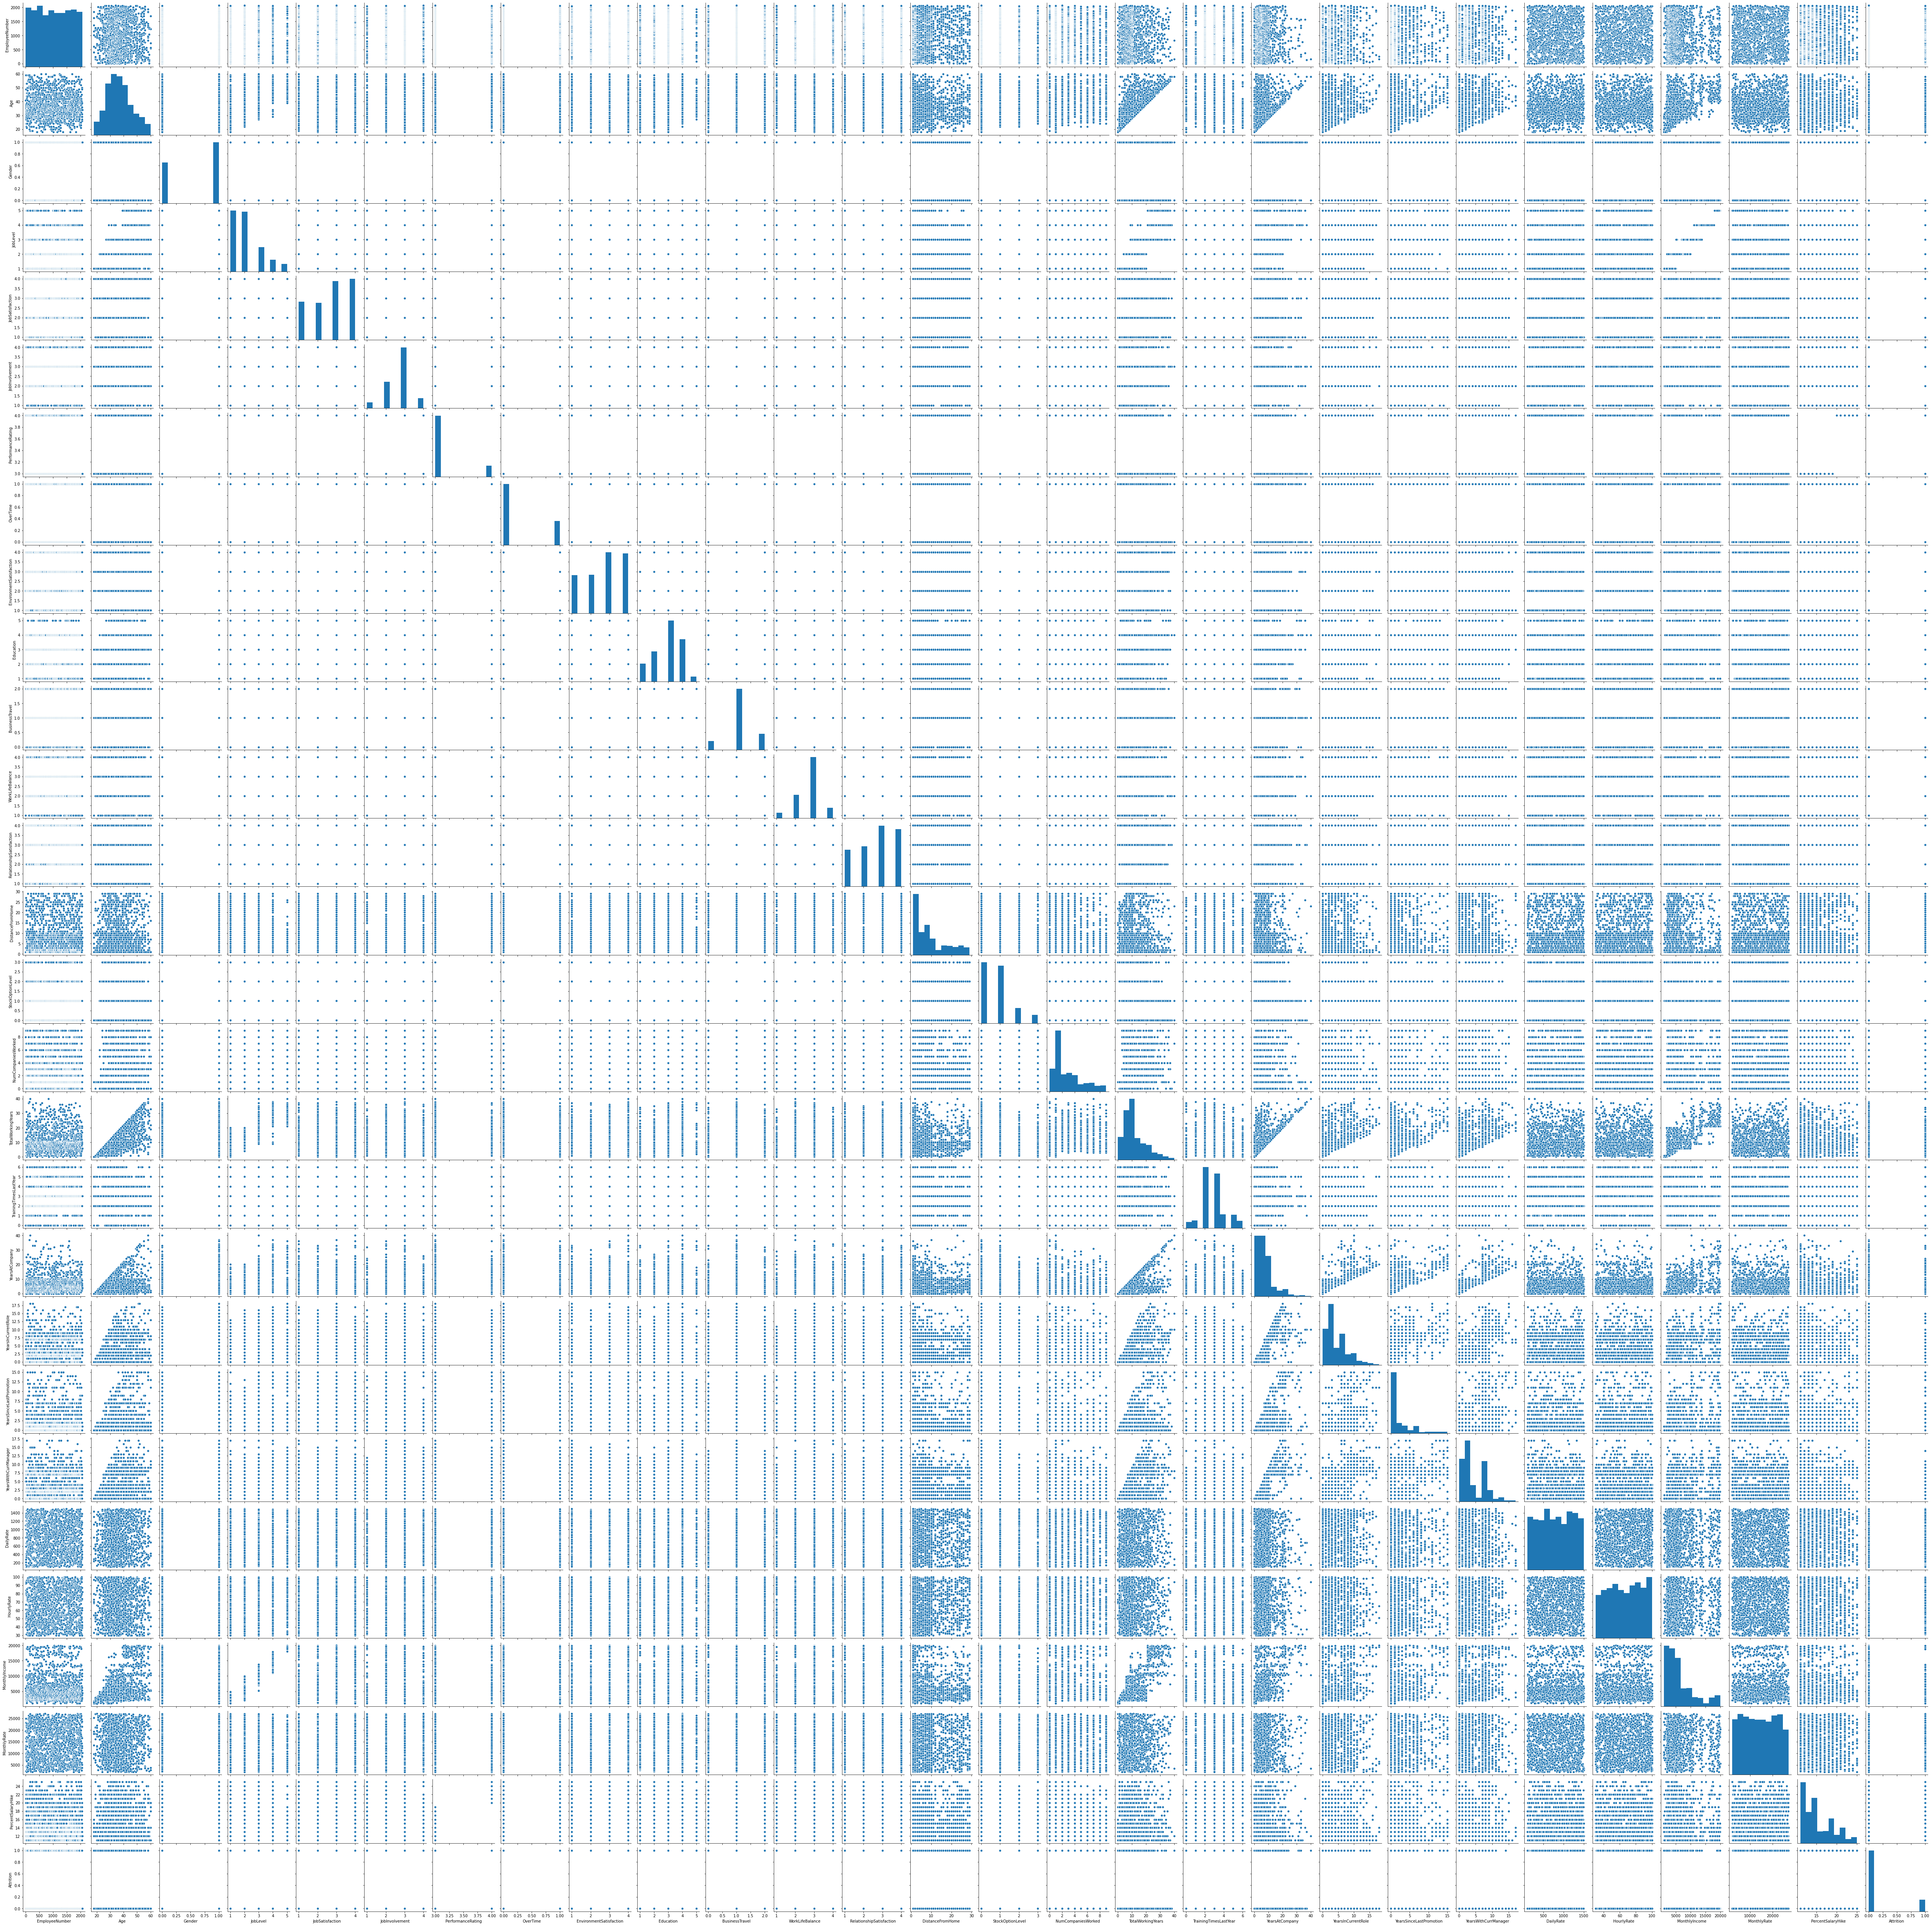

In [89]:
#sns.pairplot(df)

#### 1. Pearson Correlation (continuous vs continuous)

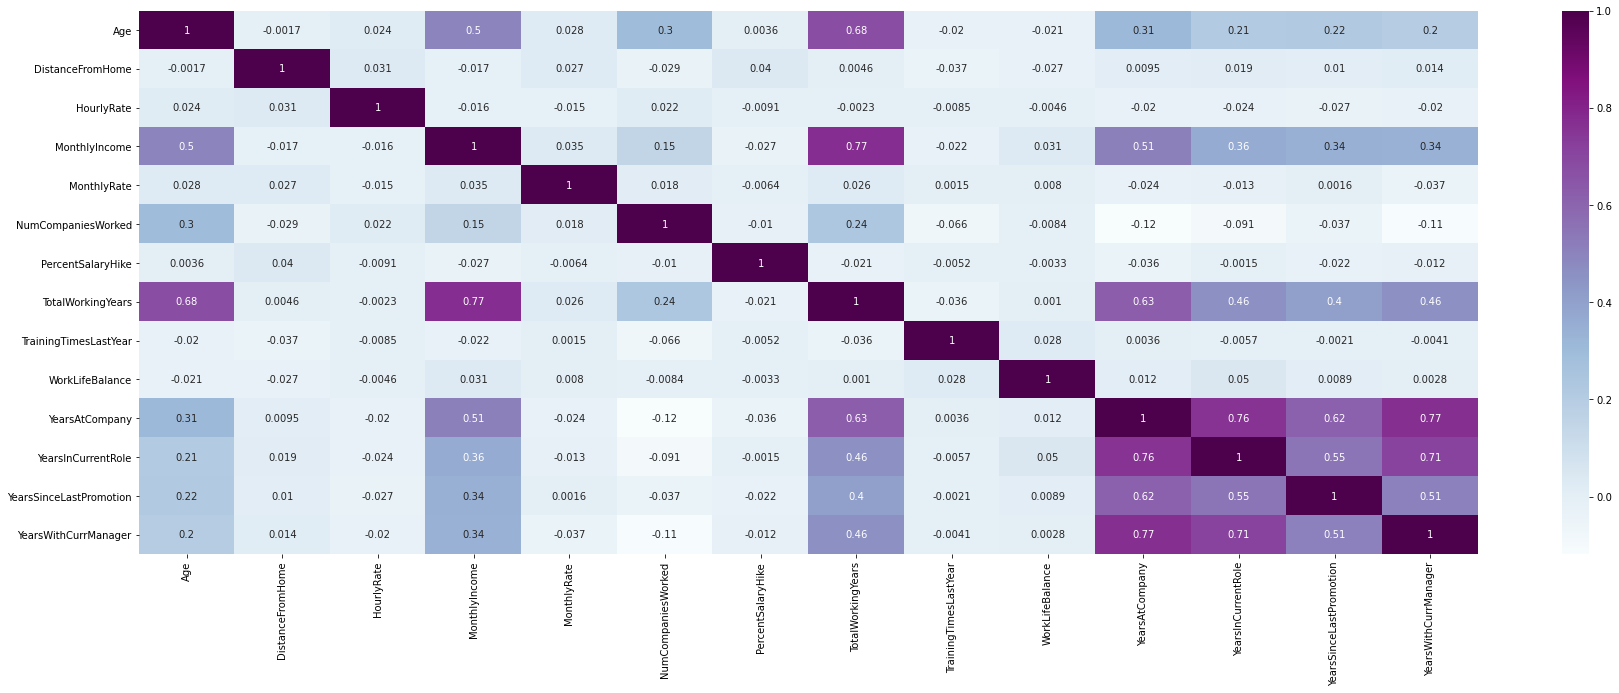

In [19]:
plt.figure(figsize=(30,10))
dataplot = sns.heatmap(con_df.corr(method = "pearson"), annot = True, cmap="BuPu")

#### 2. Spearmann/Kendall Correlation (ordinal vs ordinal)

Assume monotonic(always increasing or always decreasing functions) relationship between the two variables 

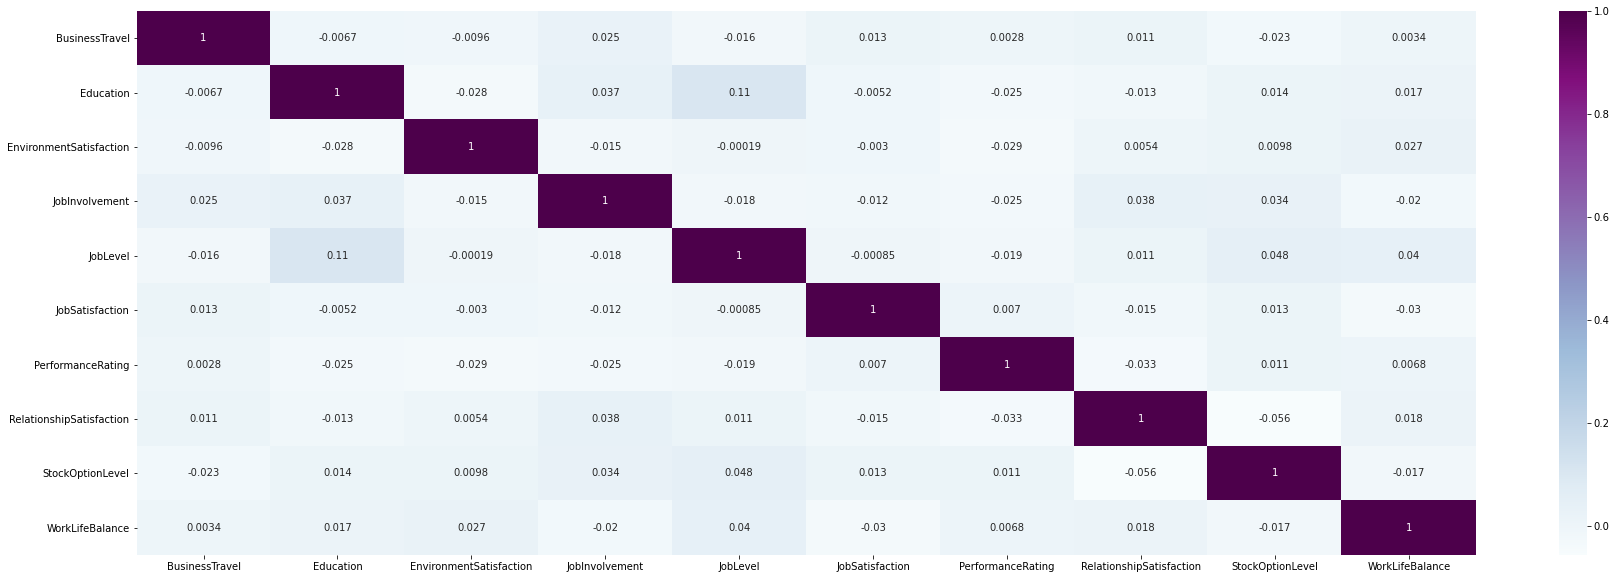

In [20]:
#Not sure if this is valuable or even correct :P
plt.figure(figsize=(30,10))
dataplot = sns.heatmap(ord_df.corr(method = "spearman"), annot = True, cmap="BuPu")

In [21]:
ord_df.corr('spearman')

BusinessTravel  Education  EnvironmentSatisfaction  \
BusinessTravel                  1.000000  -0.006690                -0.009586   
Education                      -0.006690   1.000000                -0.027625   
EnvironmentSatisfaction        -0.009586  -0.027625                 1.000000   
JobInvolvement                  0.025005   0.037231                -0.015301   
JobLevel                       -0.016261   0.107419                -0.000192   
JobSatisfaction                 0.013092  -0.005175                -0.002993   
PerformanceRating               0.002789  -0.025081                -0.029160   
RelationshipSatisfaction        0.010578  -0.013173                 0.005353   
StockOptionLevel               -0.023209   0.013794                 0.009826   
WorkLifeBalance                 0.003381   0.017350                 0.027169   

                          JobInvolvement  JobLevel  JobSatisfaction  \
BusinessTravel                  0.025005 -0.016261         0.013092   
Education                       0.037231  0.107419        -0.005175   
EnvironmentSatisfaction        -0.015301 -0.000192        -0.002993   
JobInvolvement                  1.000000 -0.018424        -0.012148   
JobLevel                       -0.018424  1.000000        -0.000852   
JobSatisfaction                -0.012148 -0.000852         1.000000   
PerformanceRating              -0.024733 -0.018608         0.006979   
RelationshipSatisfaction        0.037857  0.011311        -0.014679   
StockOptionLevel                0.034464  0.047786         0.012785   
WorkLifeBalance                -0.019889  0.040466        -0.029781   

                          PerformanceRating  RelationshipSatisfaction  \
BusinessTravel                     0.002789                  0.010578   
Education                         -0.025081                 -0.013173   
EnvironmentSatisfaction           -0.029160                  0.005353   
JobInvolvement                    -0.024733                  0.037857   
JobLevel                          -0.018608                  0.011311   
JobSatisfaction                    0.006979                 -0.014679   
PerformanceRating                  1.000000                 -0.032989   
RelationshipSatisfaction          -0.032989                  1.000000   
StockOptionLevel                   0.011028                 -0.056249   
WorkLifeBalance                    0.006808                  0.017684   

                          StockOptionLevel  WorkLifeBalance  
BusinessTravel                   -0.023209         0.003381  
Education                         0.013794         0.017350  
EnvironmentSatisfaction           0.009826         0.027169  
JobInvolvement                    0.034464        -0.019889  
JobLevel                          0.047786         0.040466  
JobSatisfaction                   0.012785        -0.029781  
PerformanceRating                 0.011028         0.006808  
RelationshipSatisfaction         -0.056249         0.017684  
StockOptionLevel                  1.000000        -0.016568  
WorkLifeBalance                  -0.016568         1.000000

## Phi- Coefficient - (binary VS binary)

In [22]:
#pip install phik

Note: you may need to restart the kernel to use updated packages.


In [23]:
#!git clone https://github.com/KaveIO/PhiK.git

fatal: destination path 'PhiK' already exists and is not an empty directory.


In [24]:
#pip install -e PhiK/

Obtaining file:///C:/Users/navvu/PhiKNote: you may need to restart the kernel to use updated packages.
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Attempting uninstall: phik
    Found existing installation: phik 0.12.0
    Uninstalling phik-0.12.0:
      Successfully uninstalled phik-0.12.0
  Running setup.py develop for phik



In [25]:
import phik
from phik import resources, report
bin_df.phik_matrix()

interval columns not set, guessing: ['Attrition', 'Gender', 'OverTime']


Attrition    Gender  OverTime
Attrition   1.000000  0.014016  0.372139
Gender      0.014016  1.000000  0.048427
OverTime    0.372139  0.048427  1.000000

### No correlation between the binary attributes

## Point Bi-Serial Correlation (Binary vs Continuous)

In [26]:
from scipy.stats import pointbiserialr
count = 0
#pbs_df = pd.DataFrame()
pbs_dict = {}
for i in con_df:
    for j in bin_df:
        
        pbs_dict.update( {i+" and " + j : pointbiserialr(df[i],df[j])} )
pbs_dict



{'Age and Attrition': PointbiserialrResult(correlation=-0.15920500686577926, pvalue=8.356308021103691e-10),
 'Age and Gender': PointbiserialrResult(correlation=-0.036310550115793636, pvalue=0.16409141231819271),
 'Age and OverTime': PointbiserialrResult(correlation=0.02806235708412417, pvalue=0.28227467589629984),
 'DistanceFromHome and Attrition': PointbiserialrResult(correlation=0.07792358295570355, pvalue=0.0027930600802131863),
 'DistanceFromHome and Gender': PointbiserialrResult(correlation=-0.0018505279911258596, pvalue=0.9434852863906811),
 'DistanceFromHome and OverTime': PointbiserialrResult(correlation=0.025513634949946226, pvalue=0.32830459559694264),
 'HourlyRate and Attrition': PointbiserialrResult(correlation=-0.006845549572139821, pvalue=0.7931347689944025),
 'HourlyRate and Gender': PointbiserialrResult(correlation=-0.00047829705113023625, pvalue=0.9853815085619302),
 'HourlyRate and OverTime': PointbiserialrResult(correlation=-0.0077819743609998816, pvalue=0.7656145498

In [27]:
for key in pbs_dict:
    #print(key)
    #print(pbs_dict[key])
    #print(pbs_dict[key][0])
    if (pbs_dict[key][0] < -0.5 or pbs_dict[key][0] > 0.5):
        print(key,pbs_dict[key])


## Variability (spread) of data and Outliers

Note: Maybe we should calculate bin size for each column (and construct box plot) to detect the outliers more efficiently... idk

In [ ]:
# sns.boxplot(data=df)
# sns.boxplot(data=df["HourlyRate"])


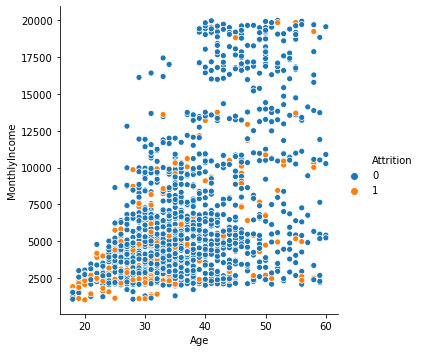

In [61]:
sns.relplot(x='Age', y='MonthlyIncome', hue = 'Attrition', data = df)

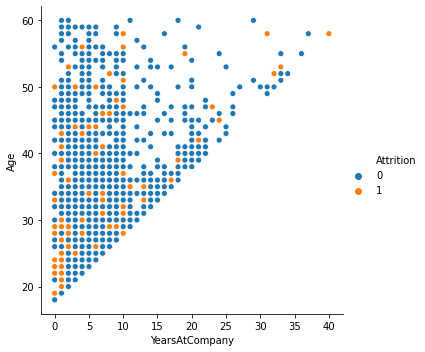

In [63]:
sns.relplot(x='YearsAtCompany', y='Age', hue = 'Attrition', data = df)

## Descriptive Statistics of Numerical data

In [14]:
con_df.describe()

Age  DistanceFromHome   HourlyRate  MonthlyIncome  \
count  1470.000000       1470.000000  1470.000000    1470.000000   
mean     36.923810          9.192517    65.891156    6502.931293   
std       9.135373          8.106864    20.329428    4707.956783   
min      18.000000          1.000000    30.000000    1009.000000   
25%      30.000000          2.000000    48.000000    2911.000000   
50%      36.000000          7.000000    66.000000    4919.000000   
75%      43.000000         14.000000    83.750000    8379.000000   
max      60.000000         29.000000   100.000000   19999.000000   

        MonthlyRate  NumCompaniesWorked  PercentSalaryHike  TotalWorkingYears  \
count   1470.000000         1470.000000        1470.000000        1470.000000   
mean   14313.103401            2.693197          15.209524          11.279592   
std     7117.786044            2.498009           3.659938           7.780782   
min     2094.000000            0.000000          11.000000           0.000000   
25%     8047.000000            1.000000          12.000000           6.000000   
50%    14235.500000            2.000000          14.000000          10.000000   
75%    20461.500000            4.000000          18.000000          15.000000   
max    26999.000000            9.000000          25.000000          40.000000   

       TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
count            1470.000000      1470.000000     1470.000000   
mean                2.799320         2.761224        7.008163   
std                 1.289271         0.706476        6.126525   
min                 0.000000         1.000000        0.000000   
25%                 2.000000         2.000000        3.000000   
50%                 3.000000         3.000000        5.000000   
75%                 3.000000         3.000000        9.000000   
max                 6.000000         4.000000       40.000000   

       YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
count         1470.000000              1470.000000           1470.000000  
mean             4.229252                 2.187755              4.123129  
std              3.623137                 3.222430              3.568136  
min              0.000000                 0.000000              0.000000  
25%              2.000000                 0.000000              2.000000  
50%              3.000000                 1.000000              3.000000  
75%              7.000000                 3.000000              7.000000  
max             18.000000                15.000000             17.000000